In [51]:
import numpy as np
import math
from osgeo import gdal, ogr, osr, gdal_array
import os
import random
import rasterio

import matplotlib.pyplot as plt

In [52]:
# Working directory looks like this:
#
# surfaces
# ├───clear
# │       hemicylinder_clear.tif
# │       hemisphere_clear.tif
# │       paraboloid_clear.tif
# │
# ├───filtered
# │       hemicylinder_noisy_filtered.tif
# │       hemisphere_noisy_filtered.tif
# │       paraboloid_noisy_filtered.tif
# │
# └───noisy
#         hemicylinder_noisy.tif
#         hemicylinder_noisy.tif
#         paraboloid_noisy.tif

In [53]:
R = 75

arr1 = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr1.shape[0]
ncols = arr1.shape[1]
#arr1

In [54]:
ncols

151

In [55]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr1[x][y] = z
        except ValueError:
            pass

arr1
#print(np.array_str(arr1, precision=1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
print(np.max(arr1), np.min(arr1))

75.0 0.0


In [57]:
arr1[0][0]

arr2 = np.copy(arr1)

In [58]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_k = arr1 + arr_n * 2
arr_k

array([[ 1.52568924,  0.35580483, -4.31083516, ..., -1.78829286,
        -0.22080892,  2.70562507],
       [-2.47112482, -1.85348972,  0.50353708, ..., -0.60374507,
        -0.51571122,  0.25349548],
       [-3.01751727,  0.55707724, -1.78120885, ..., -3.1532867 ,
         3.25673521, -0.50585401],
       ...,
       [-2.25213171,  0.58132411,  3.2814857 , ..., -2.10720795,
         1.06335891, -0.69984512],
       [-0.67994203,  0.84573825,  2.2049013 , ..., -2.53188929,
        -0.43015369, -2.77249506],
       [ 1.80648503, -3.6932172 ,  0.04292524, ...,  2.11921483,
        -2.33532239,  1.37428061]])

In [59]:
print(np.max(arr1), np.min(arr1))
print(np.max(arr_n), np.min(arr_n))
print(np.max(arr_k), np.min(arr_k))

75.0 0.0
4.450915254375037 -4.167547197603257
79.69446144739045 -6.64475448443039


In [60]:
#fig, ax = plt.subplots(1, 3)
#ax[0].contour(arr1)
#ax[1].contour(arr_n)
#ax[2].contour(arr_k)
#plt.show()

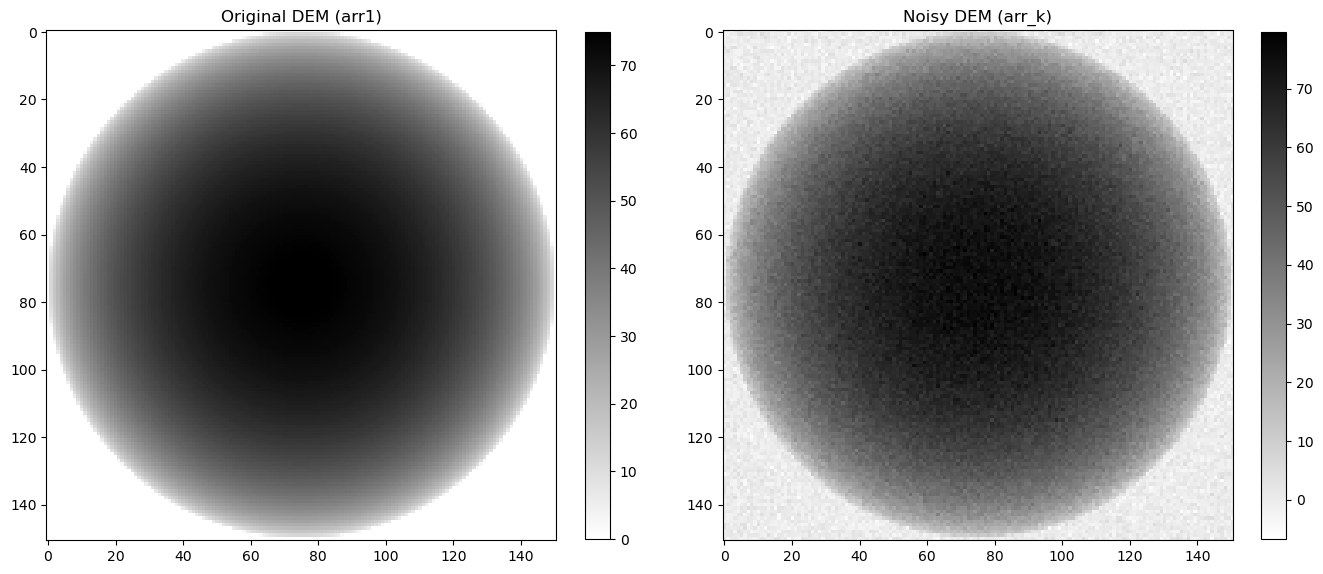

In [61]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (arr1)')
plt.imshow(arr1, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (arr_k)')
plt.imshow(arr_k, cmap='binary')
plt.colorbar(fraction=0.045)
plt.show()

In [62]:
#difference (clear-noisy)
np.subtract(arr1, arr_k)

array([[-1.52568924, -0.35580483,  4.31083516, ...,  1.78829286,
         0.22080892, -2.70562507],
       [ 2.47112482,  1.85348972, -0.50353708, ...,  0.60374507,
         0.51571122, -0.25349548],
       [ 3.01751727, -0.55707724,  1.78120885, ...,  3.1532867 ,
        -3.25673521,  0.50585401],
       ...,
       [ 2.25213171, -0.58132411, -3.2814857 , ...,  2.10720795,
        -1.06335891,  0.69984512],
       [ 0.67994203, -0.84573825, -2.2049013 , ...,  2.53188929,
         0.43015369,  2.77249506],
       [-1.80648503,  3.6932172 , -0.04292524, ..., -2.11921483,
         2.33532239, -1.37428061]])

In [63]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run in administrator mode to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr1

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemisphere_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_k
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\hemisphere_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

In [78]:
#hemicylinder
R = 30

arr_c = np.zeros((int(3*R), int(2*R)+1), dtype = 'float')
nrows = arr_c.shape[0]
ncols = arr_c.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_c[x][y] = z
        except ValueError:
            pass

#arr_c

In [79]:
np.max(arr_c)

30.0

In [82]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_cn = arr_c + arr_n * 2
#arr_cn

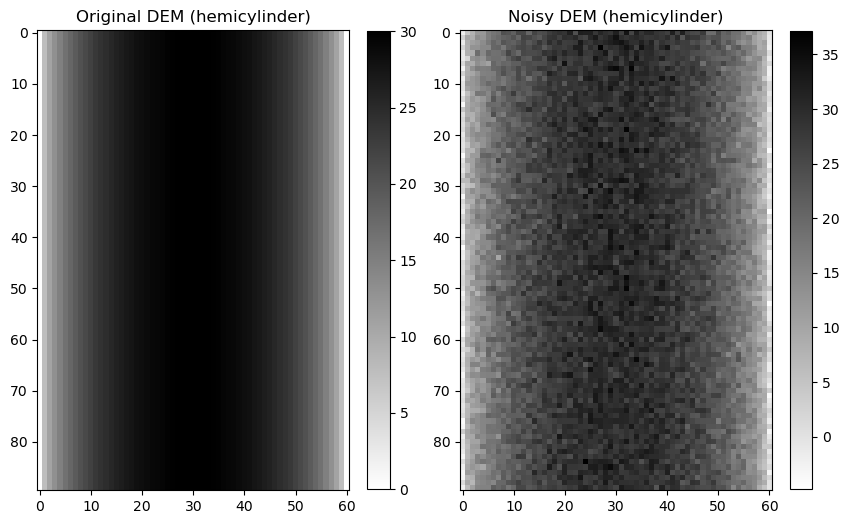

In [83]:
#Vis
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hemicylinder)')
plt.imshow(arr_c, cmap='binary')
plt.colorbar(fraction=0.065)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hemicylinder)')
plt.imshow(arr_cn, cmap='binary')
plt.colorbar(fraction=0.065)
plt.show()

In [84]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_c

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemicylinder_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_cn
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\hemicylinder_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

In [106]:
#hyperbolic paraboloid
# z = (x**2 / a**2) - (y**2 / b**2)

a1 = 100
b1 = 100

arr_hp = np.zeros((int(2*a1)+1, int(2*a1)+1), dtype = 'float')
nrows = arr_hp.shape[0]
ncols = arr_hp.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (x**2 / a1**2) - (y**2 / b1**2)
            arr_hp[x][y] = z
        except ValueError:
            pass

#arr_hp

In [109]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_hpn = arr_hp + arr_n * 0.5
#arr_hpn

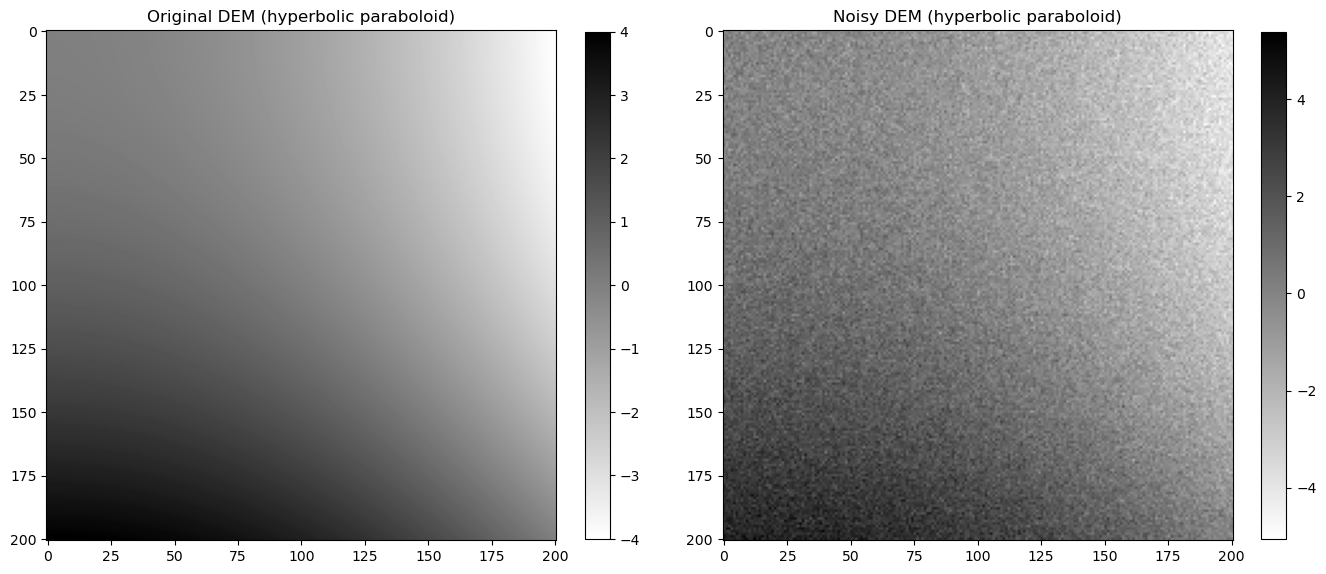

In [116]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hyperbolic paraboloid)')
plt.imshow(arr_hp, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hyperbolic paraboloid)')
plt.imshow(arr_hpn, cmap='binary')
plt.colorbar(fraction=0.045)

#fig.suptitle

plt.show()

In [112]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_hp

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\paraboloid_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_hpn
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\paraboloid_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

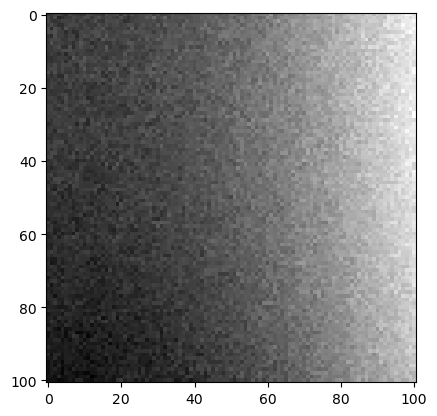

In [113]:
# Checking if the raster is saved correctly
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\filtered\paraboloid_filtered.tif", 'r') as ds:
    arr = ds.read()
    
plt.imshow(arr[0], cmap='binary')
plt.show()